In [1]:
#######################################################
# Activity Prediction by loss function regularization #
# @author: A.Prof. Tran Van Lang, PhD                 #
# File: usingLossFunction.py                          #
#######################################################

import pandas as pd
import csv
import os
import warnings
import numpy as np
from time import time

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from keras.losses import BinaryCrossentropy
import tensorflow as tf

from visualLang import *

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
path = 'data/BioassayDatasets/AID373red'
df_train = pd.read_csv( path + '_train.csv')
df_test  = pd.read_csv( path + '_test.csv' )

# Delete the missing values datapoint
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

# Chuyển đổi nhãn thành số nguyên
label_mapping = {'Inactive': 1, 'Active': 0}
df_train['Outcome'] = df_train['Outcome'].map(label_mapping)
df_test['Outcome'] = df_test['Outcome'].map(label_mapping)

# Tách các đặc trưng (features) và nhãn (labels) từ tập dữ liệu
X_train = df_train.drop(columns=['Outcome'])
y_train = df_train['Outcome']

X_test = df_test.drop(columns=['Outcome'])
y_test = df_test['Outcome']

results = []

print("Số lượng mẫu dùng huấn luyện:", len(X_train))
num_minority_samples = np.sum(y_train==0)
num_majority_samples = np.sum(y_train==1)
print( 'Số mẫu của 2 nhãn là %d và %d' % (num_minority_samples,num_majority_samples) )

Số lượng mẫu dùng huấn luyện: 47831
Số mẫu của 2 nhãn là 50 và 47781


Epoch 1/10
1196/1196 [==============================] - 1s 670us/step - loss: 0.0025 - accuracy: 0.9972 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
1196/1196 [==============================] - 1s 521us/step - loss: 5.4341e-11 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
1196/1196 [==============================] - 1s 510us/step - loss: 5.7938e-08 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
1196/1196 [==============================] - 1s 486us/step - loss: 1.2381e-09 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1196/1196 [==============================] - 1s 514us/step - loss: 2.5472e-08 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1196/1196 [==============================] - 1s 510us/step - loss: 1.1036e-07 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1196/1196 [==============================] - 1s 523us/step - loss: 9.

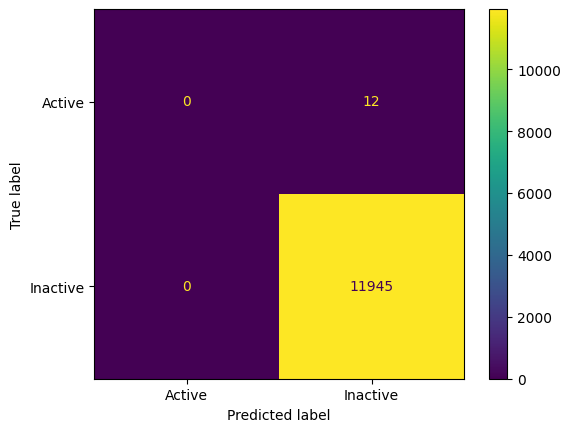

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình với hàm mất mát tùy chỉnh (Focal Loss)
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = K.cast(y_true, dtype=K.floatx())   # Chuyển đổi kiểu dữ liệu của nhãn thành float32
        bce = K.binary_crossentropy(y_true, y_pred) # Tính binary cross-entropy    
        focal_weight = alpha * K.pow(1 - y_pred, gamma) # Tính focal weight dựa trên dự đoán và tham số alpha
        focal_loss = focal_weight * bce # Tính focal loss
        return K.mean(focal_loss)
    return focal_loss_fixed

model.compile(optimizer='adam', loss=focal_loss(gamma=2, alpha=0.25), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

estimator,metric,npred = visualization_proba('FocalLoss_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Epoch 1/10
1196/1196 [==============================] - 1s 587us/step - loss: 0.0305 - accuracy: 0.9956 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 2/10
1196/1196 [==============================] - 1s 536us/step - loss: 2.2965e-07 - accuracy: 0.9987 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 3/10
1196/1196 [==============================] - 1s 512us/step - loss: 7.1008e-05 - accuracy: 0.9987 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 4/10
1196/1196 [==============================] - 1s 567us/step - loss: 1.2041e-07 - accuracy: 0.9987 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 5/10
1196/1196 [==============================] - 1s 530us/step - loss: 1.3138e-07 - accuracy: 0.9987 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 6/10
1196/1196 [==============================] - 1s 539us/step - loss: 1.2415e-07 - accuracy: 0.9987 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 7/10
1196/1196 [==============================] - 1s 539us/step - loss: 1.

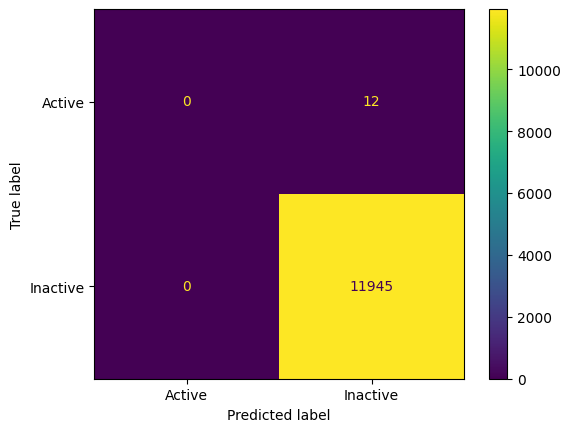

In [4]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile mô hình với hàm mất mát tùy chỉnh (Balanced Cross Entropy)
def balanced_crossentropy(y_true, y_pred):
    y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())  # Tránh trường hợp log(0)
    y_true = K.cast(y_true, dtype=K.floatx())  # Chuyển đổi kiểu dữ liệu của nhãn thành float32
    loss = -K.mean(K.sum(y_true * K.log(y_pred), axis=-1))
    return loss

class_weight = {0: 10.0, 1: 1.0}
model.compile(optimizer='adam', loss=balanced_crossentropy, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, class_weight=class_weight)

estimator,metric,npred = visualization_proba('BalancedCrossEntropy_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Epoch 1/10
1495/1495 [==============================] - 1s 579us/step - loss: 23.0516 - accuracy: 0.9982
Epoch 2/10
1495/1495 [==============================] - 1s 454us/step - loss: 10.3871 - accuracy: 0.9990
Epoch 3/10
1495/1495 [==============================] - 1s 451us/step - loss: 10.6237 - accuracy: 0.9990
Epoch 4/10
1495/1495 [==============================] - 1s 444us/step - loss: 10.0561 - accuracy: 0.9990
Epoch 5/10
1495/1495 [==============================] - 1s 444us/step - loss: 8.8323 - accuracy: 0.9990
Epoch 6/10
1495/1495 [==============================] - 1s 449us/step - loss: 9.3080 - accuracy: 0.9990
Epoch 7/10
1495/1495 [==============================] - 1s 444us/step - loss: 8.7668 - accuracy: 0.9990
Epoch 8/10
1495/1495 [==============================] - 1s 446us/step - loss: 8.1187 - accuracy: 0.9990
Epoch 9/10
1495/1495 [==============================] - 1s 450us/step - loss: 8.5365 - accuracy: 0.9990
Epoch 10/10
374/374 [==============================] - 0s 26

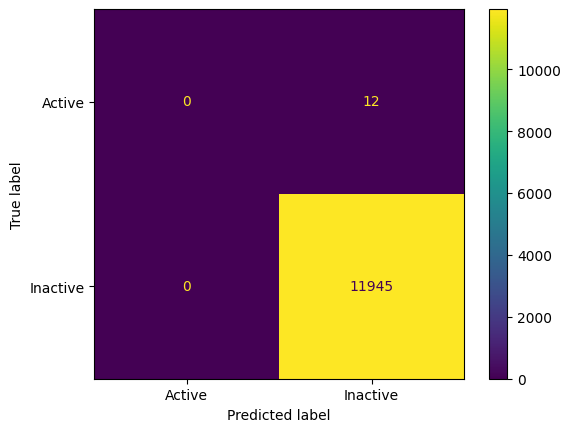

In [5]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Define hàm mất mát sử dụng Weighted Cross-Entropy Loss
# Tăng trọng số của lớp positive để cân bằng dữ liệu mất cân bằng
def weighted_binary_crossentropy(y_true, y_pred):
    # Tăng trọng số của lớp positive (nhãn 0) so với lớp negative (nhãn 1)
    weight_positive = num_majority_samples / num_minority_samples
    weight_negative = 1.0
    bce = BinaryCrossentropy()
    y_true = K.cast(y_true, dtype=K.floatx())  # Chuyển đổi kiểu dữ liệu của nhãn thành float32
    return (weight_positive * y_true * bce(y_true, y_pred)) + (weight_negative * (1 - y_true) * bce(y_true, y_pred))

# Compile model với hàm mất mát là weighted_binary_crossentropy
model.compile(optimizer='adam', loss=weighted_binary_crossentropy, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

estimator,metric,npred = visualization_proba('WeightedCrossEntropy_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Epoch 1/10
1495/1495 [==============================] - 1s 448us/step - loss: 0.0069 - accuracy: 0.9958
Epoch 2/10
1495/1495 [==============================] - 1s 443us/step - loss: 4.0116e-10 - accuracy: 0.9990
Epoch 3/10
1495/1495 [==============================] - 1s 444us/step - loss: 1.1269e-05 - accuracy: 0.9989
Epoch 4/10
1495/1495 [==============================] - 1s 442us/step - loss: 2.5154e-07 - accuracy: 0.9990
Epoch 5/10
1495/1495 [==============================] - 1s 449us/step - loss: 4.7336e-21 - accuracy: 0.9990
Epoch 6/10
1495/1495 [==============================] - 1s 458us/step - loss: 1.4814e-16 - accuracy: 0.9990
Epoch 7/10
1495/1495 [==============================] - 1s 449us/step - loss: 6.6546e-21 - accuracy: 0.9990
Epoch 8/10
1495/1495 [==============================] - 1s 440us/step - loss: 3.3342e-17 - accuracy: 0.9990
Epoch 9/10
1495/1495 [==============================] - 1s 580us/step - loss: 2.5066e-17 - accuracy: 0.9990
Epoch 10/10
374/374 [===========

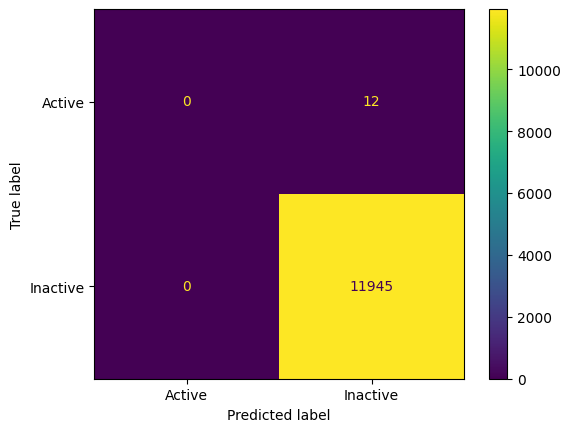

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

def dice_loss(y_true, y_pred, smooth=1e-7):
    y_true = K.cast(y_true, dtype=K.floatx())  # Chuyển đổi kiểu dữ liệu của nhãn thành float32   
    intersection = K.sum(y_true * y_pred, axis=-1)
    dice = (2. * intersection + smooth) / (K.sum(y_true, axis=-1) + K.sum(y_pred, axis=-1) + smooth)
    dice_loss = 1.0 - dice
    return dice_loss
    
model.compile(optimizer='adam', loss=focal_loss(gamma=2.0, alpha=0.25), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

estimator,metric,npred = visualization_proba('DiceLoss_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Epoch 1/10
1495/1495 [==============================] - 1s 463us/step - loss: -0.9977 - accuracy: 0.0022
Epoch 2/10
1495/1495 [==============================] - 1s 468us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 3/10
1495/1495 [==============================] - 1s 452us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 4/10
1495/1495 [==============================] - 1s 464us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 5/10
1495/1495 [==============================] - 1s 447us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 6/10
1495/1495 [==============================] - 1s 463us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 7/10
1495/1495 [==============================] - 1s 580us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 8/10
1495/1495 [==============================] - 1s 435us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 9/10
1495/1495 [==============================] - 1s 443us/step - loss: -0.9990 - accuracy: 0.0010
Epoch 10/10
374/374 [==============================] - 

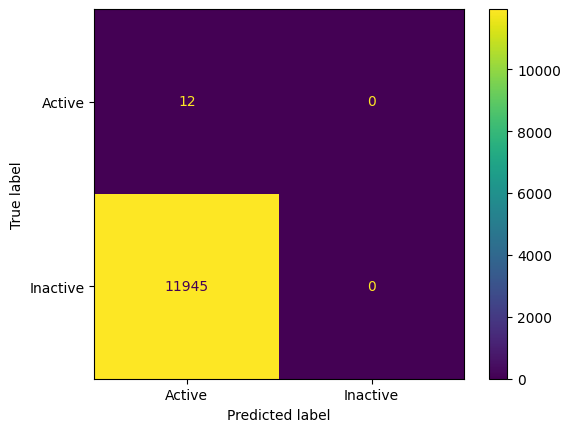

In [7]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

def focal_tversky_loss(y_true, y_pred, alpha=0.7, beta=0.3, gamma=1.0):
    y_true = K.cast(y_true, dtype=K.floatx())  # Chuyển đổi kiểu dữ liệu của nhãn thành float32   
    # Tính các thành phần của Focal Tversky Loss
    tp = K.sum(y_true * y_pred, axis=-1)
    fp = K.sum((1 - y_true) * y_pred, axis=-1)
    fn = K.sum(y_true * (1 - y_pred), axis=-1)
    
    tversky = (tp + K.epsilon()) / (tp + alpha * fp + beta * fn + K.epsilon())
    focal_tversky = K.pow((1 - tversky), gamma)
    return -K.mean(focal_tversky)

model.compile(optimizer='adam', loss=focal_tversky_loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

estimator,metric,npred = visualization_proba('FocalTverskyLoss_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Epoch 1/10
1495/1495 [==============================] - 1s 443us/step - loss: 0.0243 - accuracy: 0.9986
Epoch 2/10
1495/1495 [==============================] - 1s 436us/step - loss: 0.0117 - accuracy: 0.9990
Epoch 3/10
1495/1495 [==============================] - 1s 438us/step - loss: 0.0108 - accuracy: 0.9990
Epoch 4/10
1495/1495 [==============================] - 1s 438us/step - loss: 0.0104 - accuracy: 0.9990
Epoch 5/10
1495/1495 [==============================] - 1s 442us/step - loss: 0.0099 - accuracy: 0.9990
Epoch 6/10
1495/1495 [==============================] - 1s 562us/step - loss: 0.0093 - accuracy: 0.9990
Epoch 7/10
1495/1495 [==============================] - 1s 434us/step - loss: 0.0093 - accuracy: 0.9990
Epoch 8/10
1495/1495 [==============================] - 1s 430us/step - loss: 0.0091 - accuracy: 0.9990
Epoch 9/10
1495/1495 [==============================] - 1s 486us/step - loss: 0.0088 - accuracy: 0.9990
Epoch 10/10
374/374 [==============================] - 0s 277us/

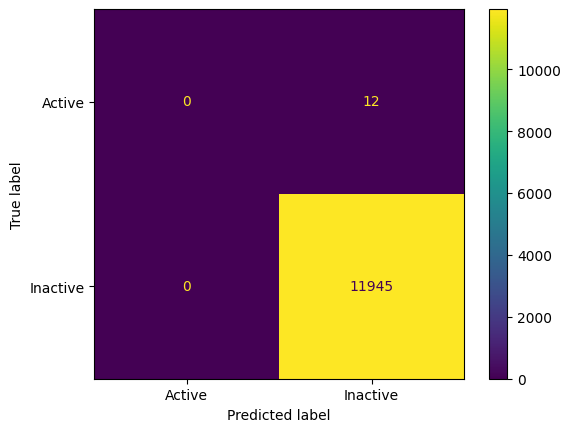

In [8]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Định nghĩa hàm mất mát Class-Balanced Loss
def class_balanced_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype=K.floatx())  # Chuyển đổi kiểu dữ liệu của nhãn thành float32   
    # Tính số lượng mẫu của từng lớp
    num_samples_per_class = tf.reduce_sum(y_true, axis=0)
    num_total_samples = tf.reduce_sum(num_samples_per_class)
    
    # Tính trọng số của từng lớp
    beta = num_total_samples / (num_samples_per_class * len(num_samples_per_class))
    weights = tf.reduce_sum(beta * y_true, axis=1)
    
    # Tính hàm mất mát
    bce = BinaryCrossentropy()
    loss = bce(y_true, y_pred)
    balanced_loss = tf.reduce_mean(weights * loss)
    return balanced_loss

model.compile(optimizer='adam', loss=class_balanced_loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

estimator,metric,npred = visualization_proba('ClassBalancedLoss_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

Epoch 1/10
1495/1495 [==============================] - 1s 460us/step - loss: -0.9989 - accuracy: 0.9988
Epoch 2/10
1495/1495 [==============================] - 1s 451us/step - loss: -0.9990 - accuracy: 0.9989
Epoch 3/10
1495/1495 [==============================] - 1s 451us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 4/10
1495/1495 [==============================] - 1s 556us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 5/10
1495/1495 [==============================] - 1s 437us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 6/10
1495/1495 [==============================] - 1s 436us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 7/10
1495/1495 [==============================] - 1s 453us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 8/10
1495/1495 [==============================] - 1s 456us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 9/10
1495/1495 [==============================] - 1s 455us/step - loss: -0.9990 - accuracy: 0.9990
Epoch 10/10
374/374 [==============================] - 

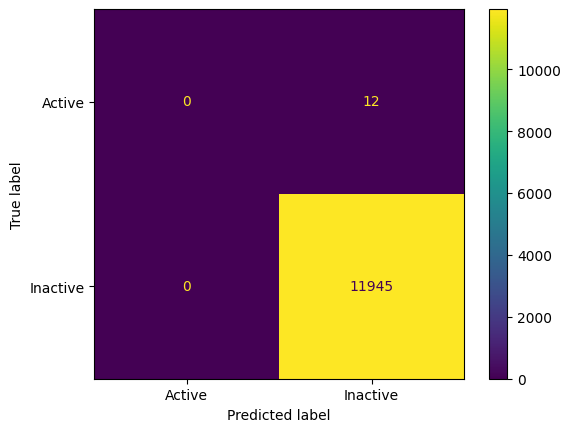

In [9]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Định nghĩa hàm mất mát Focal Cosine Loss
def focal_cosine_loss(y_true, y_pred):
    y_true = K.cast(y_true, dtype=K.floatx())  # Chuyển đổi kiểu dữ liệu của nhãn thành float32   
    alpha = 0.25
    gamma = 2.0
    bce = BinaryCrossentropy() # Tính hàm mất mát Focal Loss
    focal_loss = alpha * tf.pow(1 - y_pred, gamma) * bce(y_true, y_pred)
    cosine_loss = tf.losses.cosine_similarity(y_true, y_pred) # Tính hàm mất mát Cosine Loss
    return tf.reduce_mean(focal_loss + cosine_loss) # Tổng hợp Focal Cosine Loss

# Compile mô hình với Focal Cosine Loss
model.compile(optimizer='adam', loss=focal_cosine_loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

estimator,metric,npred = visualization_proba('ClassBalancedLoss_'+str(len(X_train)),model,X_test,y_test)
row = [estimator,metric[0],metric[1],metric[2],metric[3],metric[4],metric[5],npred[0],npred[1],npred[2],npred[3]]
results.append(row)

In [10]:
filename = os.path.basename(path) + '_Loss'
with open(filename + '.csv', "w") as file:
    writer = csv.writer(file, delimiter=",")
    writer.writerow(['Phương pháp tiếp cận','Precision','G-mean','AUC','Accuracy','Recall','F1-score','Active: Đoán đúng','Active: Đoán nhầm','Inactive: Đoán đúng','Inactive: Đoán nhầm'])
    for row in results:
        writer.writerow(row)
file.close()

df = pd.read_csv(filename + '.csv')
df.to_excel(filename + '.xlsx', index=False)
